### 比赛链接
https://www.kaggle.com/c/competitive-data-science-predict-future-sales

### 项目说明  
该数据集由俄罗斯最大的软件公司之一-1C Company提供。   
项目目标是预测该公司接下来2015年11月的商品销量。  
项目得分使用RMSD(均方根误差，即得分越低代表预测结果的误差越小，预测效果越好。)进行评估。  
项目提交的预测值范围需要在[0,20]。  

### 数据文件说明
sales_train.csv-训练集。2013年1月至2015年10月的每日历史数据。  
test.csv-测试集。您需要预测这些商店和产品在2015年11月的销售情况。  
sample_submission.csv-格式正确的示例提交文件。  
items.csv-有关商品的补充信息。  
item_categories.csv-  有关商品类别的补充信息。  
shop.csv-有关商店的补充信息。  

### 字段说明
ID- 代表测试集中的（商店，商品）元组的ID   
shop_id-商店的唯一标识符  
item_id-商品的唯一标识符  
item_category_id-商品类别的唯一标识符   
item_cnt_day-售出的商品数量。您正在预测该指标的每月金额  
item_price-商品的当前价格  
日期 -格式为dd / mm / yyyy的日期  
date_block_num-连续的月份号，为方便起见。2013年1月为0,2013年2月为1，...，2015年10月为33  
item_name-商品名称   
shop_name-商店名称  
item_category_name-商品类别名称  

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [2]:
data_sales_train  = pd.read_csv('./sales_train.csv')
data_sales_train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [3]:
def date_convert(_str):
    l = _str.split('.')[::-1]
    return '-'.join(l)

In [4]:
data_sales_train['date'] = data_sales_train['date'].apply(date_convert).astype(np.datetime64)

In [5]:
data_sales_train.loc[:,['date_block_num','shop_id','item_id']] = data_sales_train.loc[:,['date_block_num','shop_id','item_id']].astype(str)

In [6]:
data_sales_train.loc[:,['item_cnt_day']] = data_sales_train.loc[:,['item_cnt_day']].astype(int)

In [7]:
# 描述性统计分析
data_sales_train.describe() # 存在异常值(数值最小值为负数)

,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06
mean,8.908532e+02,1.242641e+00
std,1.729800e+03,2.618834e+00
min,-1.000000e+00,-2.200000e+01
25%,2.490000e+02,1.000000e+00
50%,3.990000e+02,1.000000e+00
75%,9.990000e+02,1.000000e+00
max,3.079800e+05,2.169000e+03


In [8]:
data_sales_train = data_sales_train[(data_sales_train['item_price']>0) & (data_sales_train['item_cnt_day']>0)]
data_sales_train.index = range(data_sales_train.shape[0])

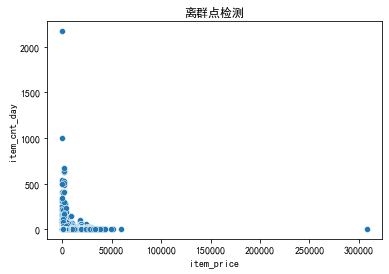

In [9]:
# 离群点检测
plt.rcParams['font.family'] = 'SimHei'
sns.scatterplot(x='item_price',y='item_cnt_day',data=data_sales_train)
plt.title("离群点检测")
plt.show()

In [10]:
#将item_price>=80000和item_cnt_day>=800的点作为离群点
data_sales_train = data_sales_train[(data_sales_train['item_price']<40000) & (data_sales_train['item_cnt_day']<400)]
data_sales_train.index = range(data_sales_train.shape[0])

In [25]:
data_test = pd.read_csv('./test.csv')
data_test

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
...,...,...,...
214195,214195,45,18454
214196,214196,45,16188
214197,214197,45,15757
214198,214198,45,19648


In [12]:
data_test = data_test.astype(str)

In [13]:
data_sub = pd.read_csv('./sample_submission.csv')
data_sub

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
214195,214195,0.5
214196,214196,0.5
214197,214197,0.5
214198,214198,0.5


In [14]:
data_item_categories = pd.read_csv('./item_categories.csv')
data_item_categories

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [15]:
data_item_categories = data_item_categories.astype(str)

In [16]:
data_items = pd.read_csv('./items.csv')
data_items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [17]:
data_items = data_items.astype(str)

In [18]:
data_shops = pd.read_csv('./shops.csv')
data_shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [19]:
data_shops = data_shops.astype(str)

### 数据探索

In [20]:
# 训练集商店数量
data_sales_train['shop_id'].value_counts().shape[0]

60

In [21]:
# 训练集商品数量
data_sales_train['item_id'].value_counts().shape[0]

21799

In [22]:
#  测试集商店数量
data_test['shop_id'].value_counts().shape[0]

42

In [23]:
# 测试集商品数量
data_test['item_id'].value_counts().shape[0]

5100

In [24]:
# 查看测试集中的商店和商品是否都包含在训练集中
shop_set = len(set(data_test['shop_id'].values).intersection(set(data_sales_train['shop_id'].values)))/len(set(data_test['shop_id'].values))
item_set = len(set(data_test['item_id'].values).intersection(set(data_sales_train['item_id'].values)))/len(set(data_test['item_id'].values))
shop_set,item_set

(1.0, 0.9288235294117647)

In [25]:
# 查看不包含的商品id
set(data_test['item_id'].values) - set(data_test['item_id'].values).intersection(set(data_sales_train['item_id'].values))

{'10028',
 '10045',
 '10054',
 '10069',
 '10176',
 '10203',
 '10310',
 '10372',
 '10483',
 '10507',
 '10747',
 '10779',
 '11267',
 '11385',
 '11762',
 '11764',
 '11765',
 '1184',
 '1193',
 '11946',
 '11974',
 '12117',
 '12409',
 '12441',
 '1246',
 '12468',
 '12469',
 '12470',
 '12471',
 '1252',
 '1253',
 '1254',
 '12568',
 '12574',
 '12591',
 '12802',
 '1284',
 '12890',
 '12920',
 '12961',
 '13047',
 '13096',
 '13209',
 '13231',
 '13232',
 '13242',
 '13249',
 '13250',
 '13251',
 '13257',
 '13263',
 '13264',
 '13271',
 '13273',
 '13275',
 '13284',
 '13295',
 '13303',
 '13309',
 '13310',
 '13313',
 '13338',
 '13392',
 '13394',
 '13402',
 '13445',
 '13446',
 '13447',
 '13558',
 '13559',
 '13745',
 '13804',
 '13805',
 '13846',
 '1386',
 '1394',
 '140',
 '1434',
 '1436',
 '1437',
 '14383',
 '14521',
 '14647',
 '14648',
 '14662',
 '14739',
 '14760',
 '14765',
 '14784',
 '14832',
 '14959',
 '14972',
 '15033',
 '15034',
 '15183',
 '15329',
 '15330',
 '15418',
 '15467',
 '15553',
 '15564',
 '15

In [26]:
# 查看商店数据集中是否存在同一个名字对应多个id的情况
(data_shops['shop_name'].value_counts() > 1).sum()

0

In [27]:
data_shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [28]:
# 查看商品数据集中是否存在同一个名字对应多个id的情况
(data_items['item_name'].value_counts() > 1).sum()

0

In [29]:
# 查看商品类别数据集中是否存在同一个名字对应多个id的情况
(data_item_categories['item_category_name'].value_counts() > 1).sum()

0

In [30]:
data_items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [31]:
data_item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


### 特征工程

In [38]:
data_item_categories.head(),data_items.head(),data_shops.head()

(        item_category_name item_category_id
 0  PC - Гарнитуры/Наушники                0
 1         Аксессуары - PS2                1
 2         Аксессуары - PS3                2
 3         Аксессуары - PS4                3
 4         Аксессуары - PSP                4,
                                            item_name item_id item_category_id
 0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D       0               40
 1  !ABBYY FineReader 12 Professional Edition Full...       1               76
 2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D       2               40
 3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D       3               40
 4        ***КОРОБКА (СТЕКЛО)                       D       4               40,
                         shop_name shop_id
 0   !Якутск Орджоникидзе, 56 фран       0
 1   !Якутск ТЦ "Центральный" фран       1
 2                Адыгея ТЦ "Мега"       2
 3  Балашиха ТРК "Октябрь-Киномир"       3
 4        Волжский ТЦ "Волга Молл"     

In [78]:
data_all = data_sales_train.merge(data_shops).merge(data_items).merge(data_item_categories)
data_all.head().append(data_all.tail())

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,2013-01-02,0,59,22154,999.0,1,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,2013-01-02,0,25,22154,999.0,1,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,2013-01-03,0,25,22154,999.0,1,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,2013-01-20,0,25,22154,999.0,1,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,2013-01-23,0,25,22154,999.0,1,"Москва ТРК ""Атриум""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2928454,2015-10-22,33,55,13093,250.0,1,Цифровой склад 1С-Онлайн,Карта оплаты Windows: 250 рублей [Цифровая вер...,36,Карты оплаты - Windows (Цифра)
2928455,2015-09-21,32,55,13091,1000.0,1,Цифровой склад 1С-Онлайн,Карта оплаты Windows: 1000 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра)
2928456,2015-09-16,32,55,13094,2500.0,1,Цифровой склад 1С-Онлайн,Карта оплаты Windows: 2500 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра)
2928457,2015-09-22,32,55,13094,2500.0,2,Цифровой склад 1С-Онлайн,Карта оплаты Windows: 2500 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра)
2928458,2015-10-26,33,55,13092,2000.0,1,Цифровой склад 1С-Онлайн,Карта оплаты Windows: 2000 рублей [Цифровая ве...,36,Карты оплаты - Windows (Цифра)


In [70]:
# data leakages(只使用测试集中包含的shop_id和item_id进行训练)
test_shop_id_l = pd.DataFrame(data_test['shop_id'].drop_duplicates())
test_shop_id_l.index = range(test_shop_id_l.shape[0])
test_item_id_l = pd.DataFrame(data_test['item_id'].drop_duplicates())
test_item_id_l.index = range(test_item_id_l.shape[0])

In [79]:
data_all_ = data_all.merge(test_shop_id_l,how='right').merge(test_item_id_l,how='right')
data_all_.head().append(data_all_.tail())

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,2014-09-21,20,5,5037,2599.0,1.0,"Вологда ТРЦ ""Мармелад""","NHL 15 [PS3, русские субтитры]",19,Игры - PS3
1,2014-11-29,22,5,5037,2599.0,1.0,"Вологда ТРЦ ""Мармелад""","NHL 15 [PS3, русские субтитры]",19,Игры - PS3
2,2014-12-28,23,5,5037,1999.0,1.0,"Вологда ТРЦ ""Мармелад""","NHL 15 [PS3, русские субтитры]",19,Игры - PS3
3,2014-12-20,23,5,5037,1999.0,1.0,"Вологда ТРЦ ""Мармелад""","NHL 15 [PS3, русские субтитры]",19,Игры - PS3
4,2015-01-02,24,5,5037,1999.0,1.0,"Вологда ТРЦ ""Мармелад""","NHL 15 [PS3, русские субтитры]",19,Игры - PS3
1221859,2014-12-07,23,39,969,398.0,1.0,"РостовНаДону ТРК ""Мегацентр Горизонт""",3 ДНЯ НА УБИЙСТВО (BD),37,Кино - Blu-Ray
1221860,2014-06-22,17,45,969,549.0,1.0,"Самара ТЦ ""ПаркХаус""",3 ДНЯ НА УБИЙСТВО (BD),37,Кино - Blu-Ray
1221861,2014-06-28,17,45,969,549.0,2.0,"Самара ТЦ ""ПаркХаус""",3 ДНЯ НА УБИЙСТВО (BD),37,Кино - Blu-Ray
1221862,2014-07-11,18,45,969,549.0,1.0,"Самара ТЦ ""ПаркХаус""",3 ДНЯ НА УБИЙСТВО (BD),37,Кино - Blu-Ray
1221863,2014-08-09,19,45,969,549.0,1.0,"Самара ТЦ ""ПаркХаус""",3 ДНЯ НА УБИЙСТВО (BD),37,Кино - Blu-Ray


In [89]:
data_train_month =  data_all_[['date', 'date_block_num', 'shop_id', 'item_category_id', 'item_id', 'item_price', 'item_cnt_day']]
data_train_month

,date,date_block_num,shop_id,item_category_id,item_id,item_price,item_cnt_day
0,2014-09-21,20,5,19,5037,2599.0,1.0
1,2014-11-29,22,5,19,5037,2599.0,1.0
2,2014-12-28,23,5,19,5037,1999.0,1.0
3,2014-12-20,23,5,19,5037,1999.0,1.0
4,2015-01-02,24,5,19,5037,1999.0,1.0
...,...,...,...,...,...,...,...
1221859,2014-12-07,23,39,37,969,398.0,1.0
1221860,2014-06-22,17,45,37,969,549.0,1.0
1221861,2014-06-28,17,45,37,969,549.0,2.0
1221862,2014-07-11,18,45,37,969,549.0,1.0


In [86]:
data_train_month.isnull().sum() # 在进行数据连接的时候测试集中有item_id是训练集中没有的

date                384
date_block_num      384
shop_id             384
item_category_id    384
item_id               0
item_price          384
item_cnt_day        384
dtype: int64

In [93]:
data_train_month.dropna(inplace=True)
data_train_month.index = range(data_train_month.shape[0])
data_train_month

,date,date_block_num,shop_id,item_category_id,item_id,item_price,item_cnt_day
0,2014-09-21,20,5,19,5037,2599.0,1.0
1,2014-11-29,22,5,19,5037,2599.0,1.0
2,2014-12-28,23,5,19,5037,1999.0,1.0
3,2014-12-20,23,5,19,5037,1999.0,1.0
4,2015-01-02,24,5,19,5037,1999.0,1.0
...,...,...,...,...,...,...,...
1221475,2014-12-07,23,39,37,969,398.0,1.0
1221476,2014-06-22,17,45,37,969,549.0,1.0
1221477,2014-06-28,17,45,37,969,549.0,2.0
1221478,2014-07-11,18,45,37,969,549.0,1.0


In [95]:
data_train_month.sort_values('date').groupby(['date_block_num', 'shop_id', 'item_category_id', 'item_id'], as_index=False)

In [141]:
# 按照月份，商店，商品种类，商品计算销售额和销售量的相关特征
feature_monthly = data_train_month.sort_values('date').groupby(['date_block_num', 'shop_id', 'item_category_id', 'item_id'], as_index=False)
feature_monthly = feature_monthly.agg({'item_price':['sum', 'mean'], 'item_cnt_day':['sum', 'mean','count']})
feature_monthly.columns = ['date_block_num', 'shop_id', 'item_category_id', 'item_id', 'sum_item_price', 'mean_item_price', 'sum_item_cnt', 'mean_item_cnt', 'count_item_cnt']
feature_monthly.head().append(feature_monthly.tail())

,date_block_num,shop_id,item_category_id,item_id,sum_item_price,mean_item_price,sum_item_cnt,mean_item_cnt,count_item_cnt
0,0,10,19,3076,1059.0,1059.0,1.0,1.000,1
1,0,10,19,3686,2936.0,734.0,4.0,1.000,4
2,0,10,19,4906,6352.0,1270.4,5.0,1.000,5
3,0,10,2,5572,1322.0,1322.0,2.0,2.000,1
4,0,10,2,5643,4120.0,2060.0,2.0,1.000,2
599898,9,7,75,4178,3180.0,1590.0,2.0,1.000,2
599899,9,7,75,4181,8720.0,1090.0,13.0,1.625,8
599900,9,7,75,4186,1990.0,1990.0,1.0,1.000,1
599901,9,7,75,5380,6980.0,3490.0,2.0,1.000,2
599902,9,7,79,17717,499.0,499.0,1.0,1.000,1


新特征说明：   
sum_item_price：销售额  
mean_item_price：每笔交易销售额    
sum_item_cnt：销售量  
mean_item_pric：:每笔销售量  
count_item_cnt：交易订单数量  

测试集中可能存在训练集中shop_id和item_id不同的组合，对训练数据按照shop_id和item_id的组合进行扩充，缺失数据进行零填充

In [142]:
empty_df = []
# date_block_num,shop_id,item_id,date_block_num0-33
for i in range(34):
    for shop in test_shop_id_l.values:
        for item in test_item_id_l.values:
            empty_df.append([i, shop[0], item[0]]) 
empty_df = pd.DataFrame(empty_df, columns=['date_block_num','shop_id','item_id'])

In [143]:
feature_monthly['date_block_num'] = feature_monthly['date_block_num'].astype(int)

In [144]:
feature_monthly = empty_df.merge(feature_monthly,how='left',on=['date_block_num','shop_id','item_id']).fillna(0)

In [145]:
feature_monthly['year'] = feature_monthly['date_block_num'].apply(lambda x: ((x//12) + 2013))
feature_monthly['month'] = feature_monthly['date_block_num'].apply(lambda x: (x % 12))

In [146]:
feature_monthly

,date_block_num,shop_id,item_id,item_category_id,sum_item_price,mean_item_price,sum_item_cnt,mean_item_cnt,count_item_cnt,year,month
0,0,5,5037,0,0.0,0.0,0.0,0.0,0.0,2013,0
1,0,5,5320,0,0.0,0.0,0.0,0.0,0.0,2013,0
2,0,5,5233,0,0.0,0.0,0.0,0.0,0.0,2013,0
3,0,5,5232,0,0.0,0.0,0.0,0.0,0.0,2013,0
4,0,5,5268,0,0.0,0.0,0.0,0.0,0.0,2013,0
...,...,...,...,...,...,...,...,...,...,...,...
7282795,33,45,18454,55,99.0,99.0,1.0,1.0,1.0,2015,9
7282796,33,45,16188,0,0.0,0.0,0.0,0.0,0.0,2015,9
7282797,33,45,15757,0,0.0,0.0,0.0,0.0,0.0,2015,9
7282798,33,45,19648,0,0.0,0.0,0.0,0.0,0.0,2015,9


<AxesSubplot:xlabel='sum_item_price', ylabel='sum_item_cnt'>

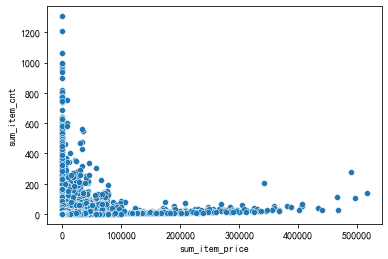

In [147]:
sns.scatterplot(x='sum_item_price',y='sum_item_cnt',data=feature_monthly)
plt.show()

In [8]:
feature_monthly.to_csv('./feature_monthly.csv',encoding='gbk')

从图sum_item_cnt>600或者sum_item_price>350000为离群点

In [4]:
feature_monthly = pd.read_csv('./feature_monthly.csv',encoding='gbk',index_col=0)

In [5]:
# 提交预测值得范围在[0,20]
feature_monthly_ = feature_monthly[(feature_monthly['sum_item_cnt']<=20) & (feature_monthly['sum_item_price']<=400000)]
feature_monthly_.index = range(feature_monthly_.shape[0])
feature_monthly_

,date_block_num,shop_id,item_id,item_category_id,sum_item_price,mean_item_price,sum_item_cnt,mean_item_cnt,count_item_cnt,year,month
0,0,5,5037,0,0.0,0.0,0.0,0.0,0.0,2013,0
1,0,5,5320,0,0.0,0.0,0.0,0.0,0.0,2013,0
2,0,5,5233,0,0.0,0.0,0.0,0.0,0.0,2013,0
3,0,5,5232,0,0.0,0.0,0.0,0.0,0.0,2013,0
4,0,5,5268,0,0.0,0.0,0.0,0.0,0.0,2013,0
...,...,...,...,...,...,...,...,...,...,...,...
7276711,33,45,18454,55,99.0,99.0,1.0,1.0,1.0,2015,9
7276712,33,45,16188,0,0.0,0.0,0.0,0.0,0.0,2015,9
7276713,33,45,15757,0,0.0,0.0,0.0,0.0,0.0,2015,9
7276714,33,45,19648,0,0.0,0.0,0.0,0.0,0.0,2015,9


In [6]:
# 2013年1月至2015年10月的每日历史数据，需要预测这些商店和产品在2015年11月的销售情况。
# 构建label，时间线后移，一月份的label为二月份的销售量
feature_monthly_['item_cnt_month'] = feature_monthly_.sort_values('date_block_num').groupby(['shop_id', 'item_id'])['sum_item_cnt'].shift(-1)   #下个月的

In [7]:
feature_monthly_

,date_block_num,shop_id,item_id,item_category_id,sum_item_price,mean_item_price,sum_item_cnt,mean_item_cnt,count_item_cnt,year,month,item_cnt_month
0,0,5,5037,0,0.0,0.0,0.0,0.0,0.0,2013,0,0.0
1,0,5,5320,0,0.0,0.0,0.0,0.0,0.0,2013,0,0.0
2,0,5,5233,0,0.0,0.0,0.0,0.0,0.0,2013,0,0.0
3,0,5,5232,0,0.0,0.0,0.0,0.0,0.0,2013,0,0.0
4,0,5,5268,0,0.0,0.0,0.0,0.0,0.0,2013,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7276711,33,45,18454,55,99.0,99.0,1.0,1.0,1.0,2015,9,NaN
7276712,33,45,16188,0,0.0,0.0,0.0,0.0,0.0,2015,9,NaN
7276713,33,45,15757,0,0.0,0.0,0.0,0.0,0.0,2015,9,NaN
7276714,33,45,19648,0,0.0,0.0,0.0,0.0,0.0,2015,9,NaN


计算产品的销售额波动特征，包括最高销售额和最低销售额，以及销售额增量和销售额减量

In [8]:
gp_item_price = feature_monthly_.sort_values('date_block_num').groupby(['item_id'], as_index=False).agg({'sum_item_price':[np.min, np.max]})
gp_item_price.columns = ['item_id', 'min_item_price', 'max_item_price']
feature_monthly_ = pd.merge(feature_monthly_, gp_item_price, on='item_id', how='left')
feature_monthly_['price_increase'] = feature_monthly_['sum_item_price'] - feature_monthly_['min_item_price']
feature_monthly_['price_decrease'] = feature_monthly_['max_item_price'] - feature_monthly_['sum_item_price']

构建时间窗特征，对数据进行平滑，窗口大小设置为3

In [10]:
f_min = lambda x: x.rolling(window=3, min_periods=1).min()
f_max = lambda x: x.rolling(window=3, min_periods=1).max()
f_mean = lambda x: x.rolling(window=3, min_periods=1).mean()
f_std = lambda x: x.rolling(window=3, min_periods=1).std()
function_list = [f_min, f_max, f_mean, f_std]
function_name = ['min', 'max', 'mean', 'std']
for i in range(len(function_list)):
    feature_monthly_[('item_cnt_%s' % function_name[i])] = feature_monthly_.sort_values('date_block_num').groupby(['shop_id', 'item_category_id', 'item_id'])['item_cnt_month'].apply(function_list[i])

In [12]:
feature_monthly_.fillna(0,inplace=True)

将前面三个月的销量数据作为滞后历史特征

In [15]:
his_l = [1, 2, 3]
for i in his_l:
    ft_name = ('item_cnt_shifted%s' % i)
    feature_monthly_ [ft_name] = feature_monthly_  .sort_values('date_block_num').groupby(['shop_id', 'item_category_id', 'item_id'])['item_cnt_month'].shift(i)

In [17]:
feature_monthly_.fillna(0,inplace=True)

In [29]:
feature_monthly_.to_csv('./tmp/feature_monthly_.csv',encoding='gbk')